In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [10]:
from sklearn import datasets

#load Data
iris = datasets.load_iris()
feature = iris.data
target = iris.target

#Generate pandas DataFrame
df = pd.DataFrame(feature)
df.columns = iris.feature_names

In [11]:
print(target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


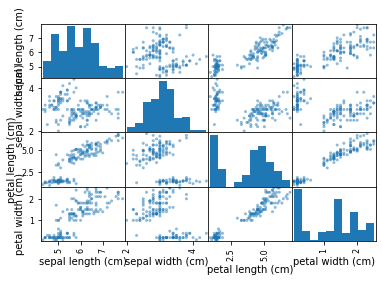

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(df)
plt.show()

In [13]:
#Elbow method to determine optimal number of cluster
from sklearn.cluster import KMeans

X = []
Y = []

for i in range(1,31):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    X.append(i)
    
    awcss = kmeans.inertia_/df.shape[0]
    Y.append(awcss)

Text(0.5, 1.0, 'K-Means Cluster Elbow method')

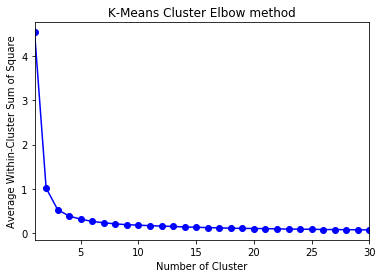

In [14]:
plt.plot(X,Y,'bo-')
plt.xlim(1,30)
plt.xlabel('Number of Cluster')
plt.ylabel('Average Within-Cluster Sum of Square')
plt.title('K-Means Cluster Elbow method')

## Principle Component Analysis

In [17]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca = PCA(n_components = 2)
pc = pca.fit_transform(df)

print(pc.shape)
print(pc[:10])

(150, 2)
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [18]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

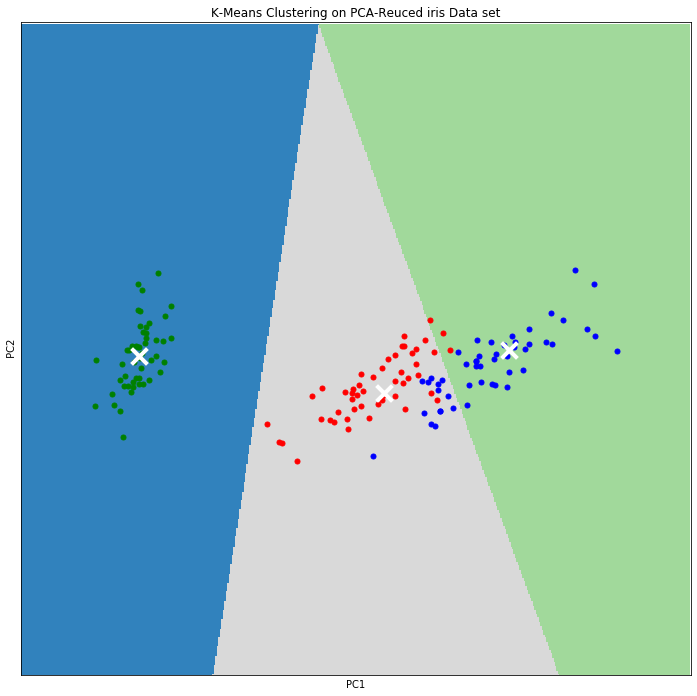

In [24]:
#Visualize the high dimentional cluster using principle component

#Set Size for mash
h = 0.02

#Generate mash grid
x_min, x_max = pc[:,0].min()-1, pc[:,0].max()+1
y_min, y_max = pc[:,0].min()-1, pc[:,0].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#label each point in mesh using last traing model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

#generate color plot from cluste
Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,12))
plt.clf()

plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          cmap= plt.cm.tab20c,
          aspect = 'auto', origin='lower')

#plot the principle component on the color plot
for i, point in enumerate(pc):
    if target[i] == 0:
        plt.plot(point[0], point[1], 'g.', markersize = 10)
    if target[i] == 1:
        plt.plot(point[0], point[1], 'r.', markersize = 10)
    if target[i] == 2:
        plt.plot(point[0], point[1], 'b.', markersize = 10)
        
#plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 250, linewidth=4, color='w', zorder=10)
plt.title('K-Means Clustering on PCA-Reuced iris Data set')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('PC1')
plt.ylabel(' PC2')
plt.xticks(())
plt.yticks(())

plt.show()

In [33]:
from sklearn import metrics

#Kmean clustering on non-reduce data
kmeans1 = KMeans(n_clusters = 3)
kmeans1.fit(feature)

#Kmean clustering on PCA reduce data
kmeans2 = KMeans(n_clusters = 3)
kmeans2.fit(feature)

#print matrix for non reduce data
print('Non Reduced Data')
print('Homogeneity {}'.format(metrics.homogeneity_score(target, kmeans1.labels_)))
print('Completeness {}'.format(metrics.completeness_score(target, kmeans1.labels_)))
print('V-measure {}'.format(metrics.v_measure_score(target, kmeans1.labels_)))

#print matrix for PCA reduce data
print('\nPCA reduced data')
print('Homogeneity {}'.format(metrics.homogeneity_score(target, kmeans2.labels_)))
print('Completeness {}'.format(metrics.completeness_score(target, kmeans2.labels_)))
print('V-measure {}'.format(metrics.v_measure_score(target, kmeans2.labels_)))

Non Reduced Data
Homogeneity 0.7514854021988338
Completeness 0.7649861514489815
V-measure 0.7581756800057784

PCA reduced data
Homogeneity 0.7514854021988339
Completeness 0.7649861514489816
V-measure 0.7581756800057786


In [35]:
print(kmeans.labels_)
print(kmeans.labels_)
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
